In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("../../utils")
from Laplacian_Sharp_Kernel import create_laplacian_sharp_filter
from Convolution import Convolution

In [6]:
# Reading the image
image = cv2.imread("../../../data/Lena.jpg",cv2.IMREAD_COLOR)
# print(image)
# Split the image
blue,green,red = cv2.split(image)

sigma_value = input("Enter the sigma value for Gaussian filter: ")
if sigma_value:
    sigma_value = float(sigma_value)
else:
    print("Invalid input. Please enter a numeric value.")
    sigma_value = None

if sigma_value is not None:
    kernel = create_laplacian_sharp_filter(kernel_size=7,sigma_value = sigma_value)
    kernel_height,kernel_width = kernel.shape
    
    # finding the center of the kernel
    center_x = kernel_height // 2
    center_y  = kernel_width // 2
    convolved_image_blue = Convolution(image=blue,kernel=kernel,anchor_row=center_x,anchor_col=center_y)
 
    convolved_image_red = Convolution(image=red,kernel=kernel,anchor_row=center_x,anchor_col=center_y)
   
    convolved_image_green = Convolution(image=green,kernel=kernel,anchor_row=center_x,anchor_col=center_y)
 
    convolved_image = cv2.merge([convolved_image_blue, convolved_image_green, convolved_image_red])
  
    # Created a 3d tewmp image
    # temp_blue= np.zeros_like(image)
    # temp_green = np.zeros_like(image)
    # temp_red = np.zeros_like(image)
    # temp_blue[:,:,0] = 255
    # temp_blue[:,:,1] = 255 - convolved_image_blue
    # temp_blue[:,:,2] = 255 - convolved_image_blue
    # temp_red[:,:,0] = 255 - convolved_image_red 
    # temp_red[:,:,1] = 255 - convolved_image_red
    # temp_red[:,:,2] = 255 
    # temp_green[:,:,2] = 255 - convolved_image_green
    # temp_green[:,:,1] = 255 
    # temp_green[:,:,0] = 255 - convolved_image_green 
    
  
  
  # convolved_image_red = 255 - convolved_image_red  //  zero = np.zeroslike(convolved_image_blue)
  # convolved_image_green = 255 - convolved_image_green
  
  
    height, width = convolved_image_blue.shape
    zeros = np.zeros((height, width), dtype=np.uint8)  # Zero array for empty channels
    blue_channel_colored = cv2.merge([ convolved_image_blue,zeros,zeros])  # Blue channel (B, 0, 0)
    green_channel_colored = cv2.merge([zeros, convolved_image_green, zeros])  # Green channel (0, G, 0)
    red_channel_colored = cv2.merge([zeros, zeros, convolved_image_red])  # Red channel (0, 0, R)
        
 
    
  # # Display each convolved channel as colored images
    cv2.imshow("Convolved Blue Channel", blue_channel_colored)
    cv2.imshow("Convolved Green Channel", green_channel_colored)
    cv2.imshow("Convolved Red Channel", red_channel_colored)
        
    #   # Display the merged convolved color image
    cv2.imshow("Convolved Color Image", convolved_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
  
  
  

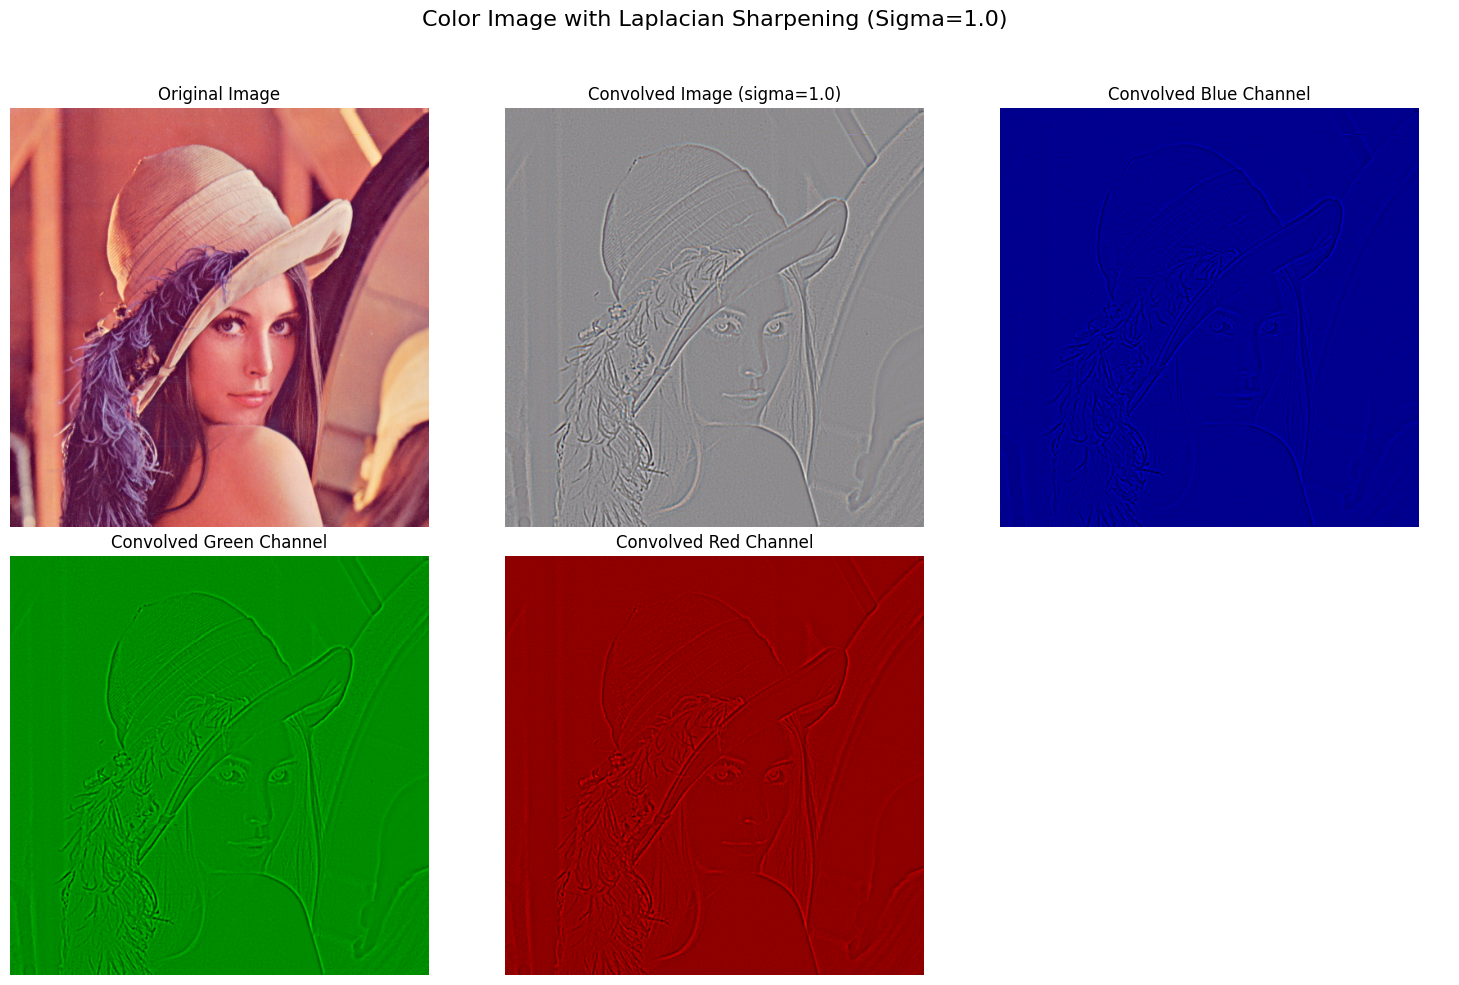

In [7]:
 # Convert BGR to RGB for Matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
convolved_image_rgb = cv2.cvtColor(convolved_image, cv2.COLOR_BGR2RGB)
blue_channel_rgb = cv2.cvtColor(blue_channel_colored, cv2.COLOR_BGR2RGB)
green_channel_rgb = cv2.cvtColor(green_channel_colored, cv2.COLOR_BGR2RGB)
red_channel_rgb = cv2.cvtColor(red_channel_colored, cv2.COLOR_BGR2RGB)
        
# Display images using Matplotlib
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 2 rows, 3 columns
axes = axes.ravel()  # Flatten for easier indexing
        
# Display images
axes[0].imshow(image_rgb)
axes[0].set_title('Original Image', fontsize=12)
axes[0].axis('off')
axes[1].imshow(convolved_image_rgb)
axes[1].set_title(f'Convolved Image (sigma={sigma_value})', fontsize=12)
axes[1].axis('off')
axes[2].imshow(blue_channel_rgb)
axes[2].set_title('Convolved Blue Channel', fontsize=12)
axes[2].axis('off')
axes[3].imshow(green_channel_rgb)
axes[3].set_title('Convolved Green Channel', fontsize=12)
axes[3].axis('off')
axes[4].imshow(red_channel_rgb)
axes[4].set_title('Convolved Red Channel', fontsize=12)
axes[4].axis('off')
axes[5].axis('off')  # Hide unused subplot
        
plt.suptitle(f'Color Image with Laplacian Sharpening (Sigma={sigma_value})', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

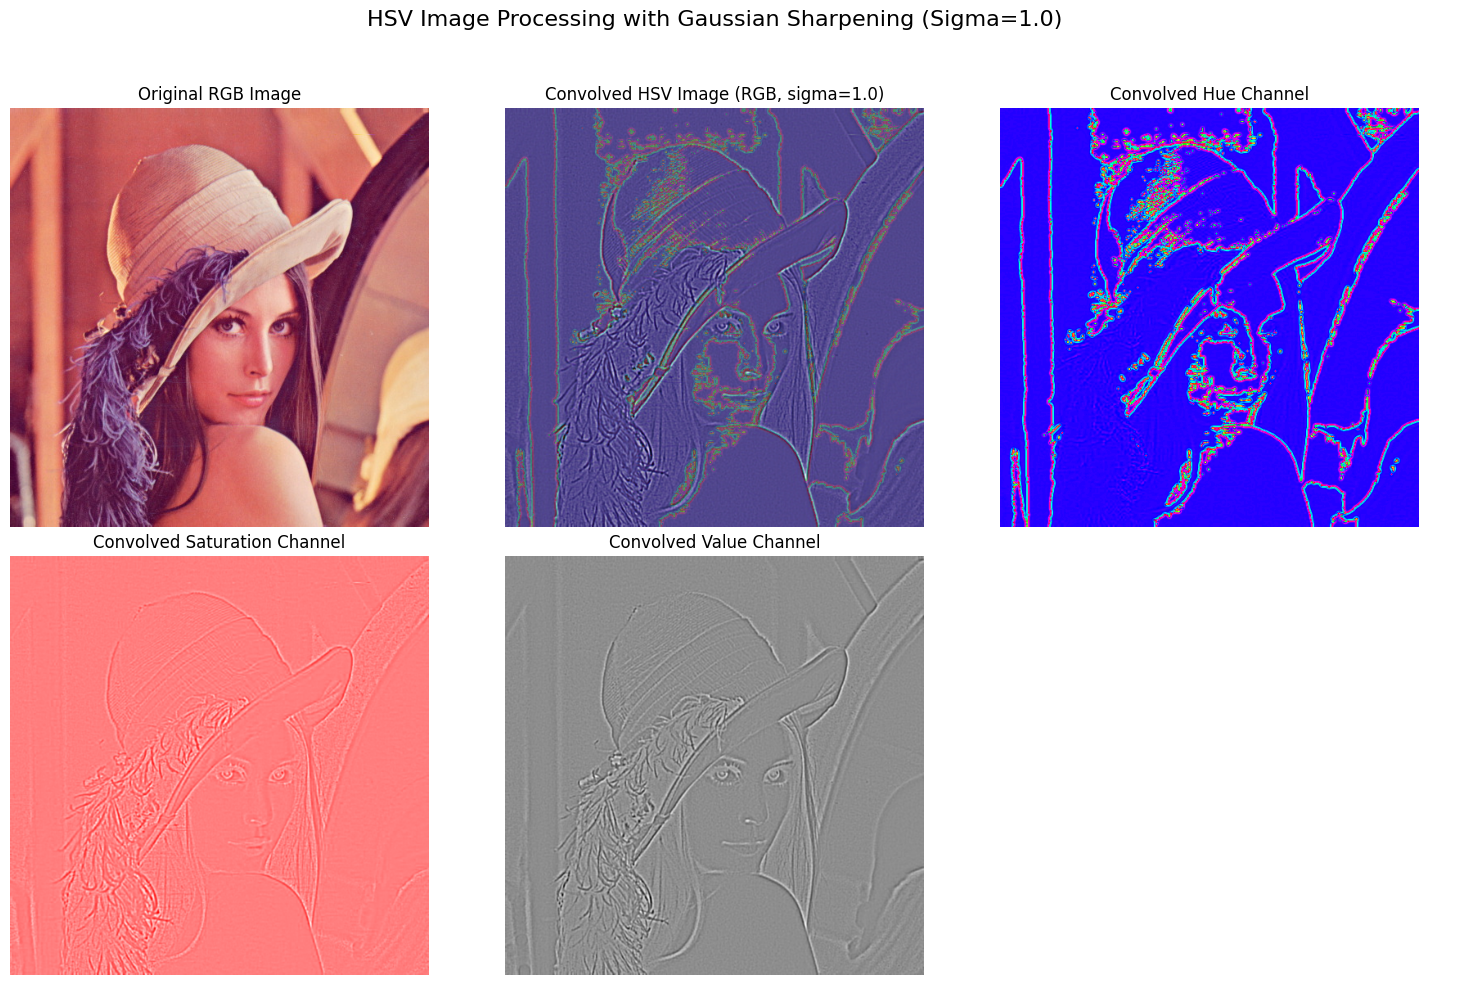

In [8]:

# Reading the image
image = cv2.imread("../../../data/Lena.jpg", cv2.IMREAD_COLOR)

# Convert RGB to HSV
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Split the HSV image into channels
hue, saturation, value = cv2.split(hsv_image)

# Get sigma value from user
sigma_value = input("Enter the sigma value for Gaussian filter: ")
try:
    sigma_value = float(sigma_value)
except ValueError:
    print("Invalid input. Please enter a numeric value.")
    sigma_value = None

if sigma_value is not None:
    try:
        # Create Gaussian filter and perform convolution
        kernel = create_laplacian_sharp_filter(kernel_size=7,sigma_value=sigma_value)
        kernel_height, kernel_width = kernel.shape
        
        # Find the center of the kernel
        center_x = kernel_height // 2
        center_y = kernel_width // 2
        
        # Apply convolution to each HSV channel
        convolved_hue = Convolution(image=hue, kernel=kernel, anchor_row=center_x, anchor_col=center_y)
        convolved_saturation = Convolution(image=saturation, kernel=kernel, anchor_row=center_x, anchor_col=center_y)
        convolved_value = Convolution(image=value, kernel=kernel, anchor_row=center_x, anchor_col=center_y)
        
        # Ensure convolved channels are uint8
        convolved_hue = np.clip(convolved_hue, 0, 255).astype(np.uint8)
        convolved_saturation = np.clip(convolved_saturation, 0, 255).astype(np.uint8)
        convolved_value = np.clip(convolved_value, 0, 255).astype(np.uint8)
        
        # Merge the convolved HSV channels
        convolved_hsv = cv2.merge([convolved_hue, convolved_saturation, convolved_value])
        
        # Convert convolved HSV back to RGB for display
        convolved_rgb = cv2.cvtColor(convolved_hsv, cv2.COLOR_HSV2BGR)
        
        # Create colored images for individual HSV channels
        height, width = convolved_hue.shape
        zeros = np.zeros((height, width), dtype=np.uint8)
        
        # Convert each HSV channel to a displayable format
        hue_hsv = cv2.merge([convolved_hue, np.full_like(convolved_hue, 255), np.full_like(convolved_hue, 255)])
        saturation_hsv = cv2.merge([np.zeros_like(convolved_saturation), convolved_saturation, np.full_like(convolved_saturation, 255)])
        value_hsv = cv2.merge([np.zeros_like(convolved_value), np.zeros_like(convolved_value), convolved_value])
        
        hue_rgb = cv2.cvtColor(hue_hsv, cv2.COLOR_HSV2BGR)
        saturation_rgb = cv2.cvtColor(saturation_hsv, cv2.COLOR_HSV2BGR)
        value_rgb = cv2.cvtColor(value_hsv, cv2.COLOR_HSV2BGR)
        
        # Convert all images to RGB for Matplotlib
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        convolved_rgb = cv2.cvtColor(convolved_rgb, cv2.COLOR_BGR2RGB)
        hue_rgb = cv2.cvtColor(hue_rgb, cv2.COLOR_BGR2RGB)
        saturation_rgb = cv2.cvtColor(saturation_rgb, cv2.COLOR_BGR2RGB)
        value_rgb = cv2.cvtColor(value_rgb, cv2.COLOR_BGR2RGB)
        
        # Display images using Matplotlib
        fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 2 rows, 3 columns
        axes = axes.ravel()  # Flatten for easier indexing
        
        # Display images
        axes[0].imshow(image_rgb)
        axes[0].set_title('Original RGB Image', fontsize=12)
        axes[0].axis('off')
        axes[1].imshow(convolved_rgb)
        axes[1].set_title(f'Convolved HSV Image (RGB, sigma={sigma_value})', fontsize=12)
        axes[1].axis('off')
        axes[2].imshow(hue_rgb)
        axes[2].set_title('Convolved Hue Channel', fontsize=12)
        axes[2].axis('off')
        axes[3].imshow(saturation_rgb)
        axes[3].set_title('Convolved Saturation Channel', fontsize=12)
        axes[3].axis('off')
        axes[4].imshow(value_rgb)
        axes[4].set_title('Convolved Value Channel', fontsize=12)
        axes[4].axis('off')
        axes[5].axis('off')  # Hide unused subplot
        
        plt.suptitle(f'HSV Image Processing with Gaussian Sharpening (Sigma={sigma_value})', fontsize=16)
        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()
        
        
        
    except Exception as e:
        print(f"Error during processing: {e}")
else:
    print("Invalid input. Please enter a numeric value.")